In [1]:
import os
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

In [11]:
data_path = "../data/amsterdam-airbnb-data.csv"
if not os.path.isfile(data_path):
    from utils import download_dataset
    download_dataset()

df = pd.read_csv(data_path)
df = df[(df.price > 50) & (df.price < 500)]
profile = ProfileReport(df, title='Amsterdam Airbnb Dataset', explorative=True)


df['cos_geo'] = np.cos(df.latitude) * np.cos(df.longitude)
df['cossin_geo'] = np.cos(df.latitude) * np.sin(df.longitude) 
df['sin_geo']= np.sin(df.latitude)

In [12]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,cos_geo,cossin_geo,sin_geo
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,60,3,278,2019-11-21,2.90,1,137,-0.115455,0.490462,0.863781
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-03-27,3.73,2,0,-0.090927,0.495350,0.863922
2,25428,"Lovely, sunny 1 bed apt in Ctr (w.lift) & firepl.",56142,Joan,NaN,Centrum-West,52.37490,4.88487,Entire home/apt,100,14,5,2020-01-02,0.12,1,58,-0.088037,0.505342,0.858417
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,138,2,221,2020-07-25,2.17,1,217,-0.093517,0.515406,0.851828
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36775,4.89092,Private room,75,2,338,2020-02-06,4.52,2,298,-0.090000,0.498747,0.862062


In [51]:
profile.to_widgets()


Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
df.drop(columns='test')

KeyError: "['test'] not found in axis"

In [21]:
type(exp_reg102)

tuple

In [13]:
from pycaret.regression import *

df.reviews_per_month.fillna(0, inplace=True)
df.last_review.fillna(0, inplace=True)

exp_reg102 = setup(data = df.drop(columns=['id', 'host_id', 'host_name', 'name', 'neighbourhood_group',
                                          'last_review', 'reviews_per_month', "number_of_reviews"]),
                   target = 'price', session_id=123, transform_target=True,
                   normalize = True, transformation = True, 
                   combine_rare_levels = True, rare_level_threshold = 0.05,
                   remove_multicollinearity = True, multicollinearity_threshold = 0.8,
                   categorical_features=['room_type', 'neighbourhood'],
                   polynomial_features=True, trigonometry_features=True,
                   feature_interaction=True, feature_ratio=True,
                   feature_selection=True, feature_selection_method='boruta',
                   silent=True
                   ) 

,Description,Value
0,session_id,123
1,Target,price
2,Original Data,"(15837, 11)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(11085, 17)"


In [14]:
best = compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,44.5125,4256.8340,65.2182,0.2006,0.3716,0.2941,0.0300
gbr,Gradient Boosting Regressor,44.7944,4344.2451,65.8845,0.1843,0.3730,0.2948,0.1720
rf,Random Forest Regressor,46.0156,4436.4034,66.5804,0.1667,0.3849,0.3079,0.4070
lr,Linear Regression,46.1312,4560.8578,67.5072,0.1436,0.3838,0.3048,0.0100
ridge,Ridge Regression,46.1314,4561.0943,67.5089,0.1436,0.3838,0.3048,0.0100
lar,Least Angle Regression,46.1312,4560.8575,67.5072,0.1436,0.3838,0.3048,0.0140
br,Bayesian Ridge,46.1326,4562.3992,67.5186,0.1433,0.3838,0.3048,0.0110
huber,Huber Regressor,46.0727,4576.4630,67.6240,0.1406,0.3847,0.3022,0.0370
ada,AdaBoost Regressor,46.9005,4600.0556,67.7963,0.1364,0.3872,0.3186,0.0560
et,Extra Trees Regressor,47.8263,4696.2747,68.4954,0.1181,0.4022,0.3244,0.2160


In [25]:
dt = create_model('lightgbm', fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,44.2668,4161.5888,64.5104,0.2004,0.3736,0.2968
1,45.1981,4233.4498,65.0650,0.1924,0.3689,0.2891
2,45.9114,4518.7643,67.2218,0.2271,0.3755,0.3028
3,43.0211,3992.9881,63.1901,0.1836,0.3660,0.2907
4,45.2294,4624.4351,68.0032,0.1661,0.3775,0.2890
5,42.9406,4032.9670,63.5056,0.2264,0.3643,0.2873
6,44.5704,4437.9613,66.6180,0.1955,0.3736,0.2916
7,45.2491,4163.5809,64.5258,0.1736,0.3731,0.2944
8,42.8689,3883.0286,62.3140,0.2233,0.3659,0.2964
9,45.8692,4519.5765,67.2278,0.2176,0.3776,0.3027


In [26]:
# # tune hyperparameters of decision tree
# tuned_dt = tune_model(dt)
# # tune hyperparameters with increased n_iter
# tuned_dt = tune_model(dt, n_iter = 150)
# tune hyperparameters to optimize MAE
tuned_dt = tune_model(dt, optimize = 'R2', n_iter = 150) #default is 'R2'
# # tune hyperparameters with custom_grid
# params = {
#           "num_leaves": list(np.random.randint(6, 50, 20)),
#           "min_child_samples": list(np.random.randint(100, 500, 20)),
#           "min_child_weight": [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
#           "reg_alpha": [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
#           "reg_lambda": [0, 1e-1, 1, 5, 10, 20, 50, 100]
#           }
# tuned_dt_custom = tune_model(dt, custom_grid = params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,44.6733,4205.2024,64.8475,0.1920,0.3753,0.2988
1,45.0163,4197.4806,64.7880,0.1993,0.3677,0.2887
2,45.9116,4552.9137,67.4753,0.2213,0.3755,0.3030
3,42.9397,4004.4214,63.2805,0.1813,0.3667,0.2908
4,45.1281,4613.3979,67.9220,0.1681,0.3767,0.2873
5,43.0166,4081.7560,63.8886,0.2171,0.3633,0.2859
6,44.6014,4469.2528,66.8525,0.1899,0.3741,0.2909
7,45.3556,4159.2888,64.4925,0.1745,0.3720,0.2937
8,42.8860,3852.6931,62.0701,0.2294,0.3652,0.2968
9,45.8647,4529.4931,67.3015,0.2158,0.3772,0.3023


In [29]:
import matplotlib.pyplot as plt
plot_model(dt, plot = 'feature_all', save=True)

'Feature Importance (All).png'


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will

[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will b


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0

In [30]:
s = plot_model(dt, plot = 'feature_all', save=True)

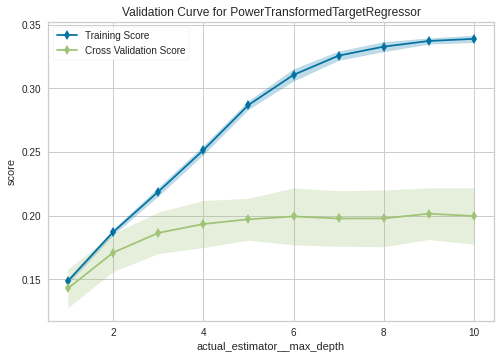


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0

In [34]:
plot_model(dt, plot = 'vc')

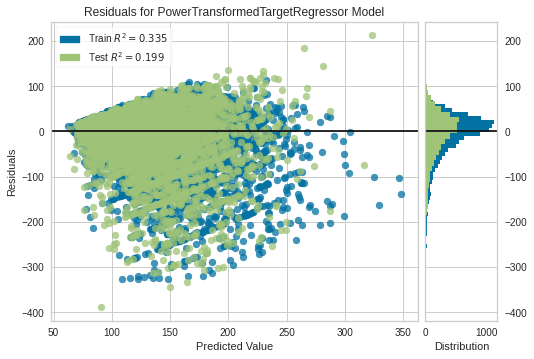

In [19]:
plot_model(dt)

In [ ]:
plot_model(lasso, plot = 'residuals_interactive')